# CS-549 Assignment 3 - Linear Regression

In [22]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

# Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.
Read in the Ecommerce Customers csv file as a DataFrame called customers

# Task 1
1. Read the data into a dataframe(df) titled customers
2. Print the information regarding the columns in the df such as their data type, non-null counts etc.
3. Print the first few rows of the df.

In [5]:
customers = pd.read_csv('Ecomm-Customers.csv')

In [6]:
customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Task 2
Use the sns library which has been imported in the first cell and implement two functions
1. Find the correlation between all the columns in customers in terms of scatter-plots.
2. Find the correlation between all the columns in customers using heat maps.

<AxesSubplot:>

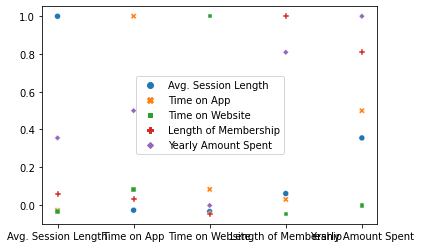

In [23]:
sns.scatterplot(data = customers.corr())

From the plots, we should see that data distribution is quite normal, and that there is a clear correlation between length of membership and yearly amount spent.

<AxesSubplot:>

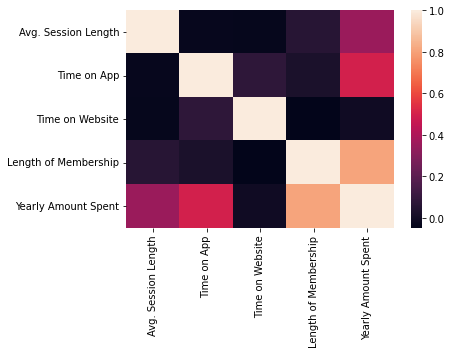

In [8]:
sns.heatmap(customers.corr())

The above heatmap confirms the correlation between 'length of membership' and 'Yearly amount spent'. We can also see that there is good degree of correlation between 'Yearly amount spent' and the column 'Time on app'. Also lesser degree of correlation with 'Avg. Session length'

For now we will develop a Linear Regression model where are dependent/Predicted(y) variable is 'Yearly Amount Spent' whereas 'Time on App' and 'Length of Membership' would be our independent variables(x).

# Task 3
1. Split Customers into x and y where x and y are df of independent and dependent variables respectively.
2. Split x and y into train and test using a test size of 0.3. You may use SKlearn to perform the split.
3. Use the train and test data to create a Linear Regression Model 'lm' and fit it. You may use SKLearn.
4. Use the model to predict for x_test and store the ir in 'result'

In [20]:
x = list(zip(customers['Time on App'].values, customers['Length of Membership'].values))
y = customers['Yearly Amount Spent'].values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [25]:
result = lm.predict(x_train)

# Task 4
1. Plot a scatter plot for 'Actual Values' vs the 'Predicted Values'
2. Plot a learning curve based on the model developed and the x and y data. Complete  the plot_lc() to achieve it. You may use seaborn, sklearn and pyplot to achieve this. (cv = 5)

ValueError: x and y must be the same size

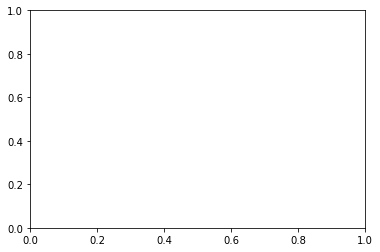

In [26]:
plt.scatter(x_test, y_test, color='black')

In [ ]:
# Function to Plot Learning curve
def plot_lc(estimator, x, y, train_sizes):
    #Your code goes here


In [ ]:
Here we are calling the plot_lc(). The output should show the learning curve.

In [153]:
plot_lc(lm,x,y,np.linspace(5, len(x_train), 10, dtype='int'))

# Task 5

Learning curve for the linear regression model shows small gap between training and validation error, meaning that variance should be reduced.  

Print the R2 Score,Variance and MSE. You may use SKLearn.

# Task 6

We can obcserve that all though the model is predicting well the variance is high. One way to tackle this is to use additional independent variable and build the model again. So lets consider 'Avg. Session Length' as well to build the new model 'lm1'.

1. Build model lm1 using 'Avg.Session Length', Time on App' and 'Length of Membership'
2. Use this model lm1 and reperform task 4 and task5.
3. Compare the results and share your thoughts on what difference has adding another independent variable has done.